In [1]:
# %% [Install required packages]
%pip install qiskit-ibm-runtime
%pip install qiskit_aer
%pip install qiskit
%pip install matplotlib

# %% [Imports]
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import qiskit as qk
from qiskit import transpile
from qiskit_aer import Aer
from qiskit.circuit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram
import math


In [3]:

# %% [Save IBM Quantum account credentials]
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="0a36966977a20de04e025a331253d45c66f8f0139cbb352cb382c5cfee983a61ee15dc87df60f9d918d753e8009d52b1270f6e67f04e3ee4a09165246759aac1",
    set_as_default=True,
    overwrite=True
)

QASM Simulator Result (Counts): {'1': 1024}


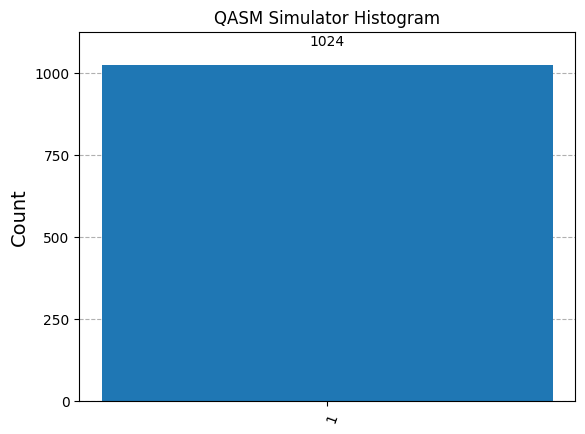

In [4]:
# %% [Create the quantum circuit]
circuit = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
circuit.x(0)                    # Apply X gate to flip qubit to |1⟩
circuit.measure(0, 0)           # Measure qubit 0 into classical bit 0

# %% [Simulate using QASM]
simulator = AerSimulator(method='automatic')  # Use AerSimulator with QASM
sim_job = simulator.run(circuit, shots=1024)  # Run with 1024 shots
sim_result = sim_job.result()
sim_counts = sim_result.get_counts()

# Show simulation result
print("QASM Simulator Result (Counts):", sim_counts)

# Plot histogram for simulation
plot_histogram(sim_counts, title="QASM Simulator Histogram")
plt.show()  # Ensure the plot displays

# Plot histogram for simulation using Qiskit's plot_histogram
plot_histogram(sim_counts, title="QASM Simulator Histogram")  # No .show() needed with %matplotlib inline

QASM Simulator Result (Counts): {'00': 1024}


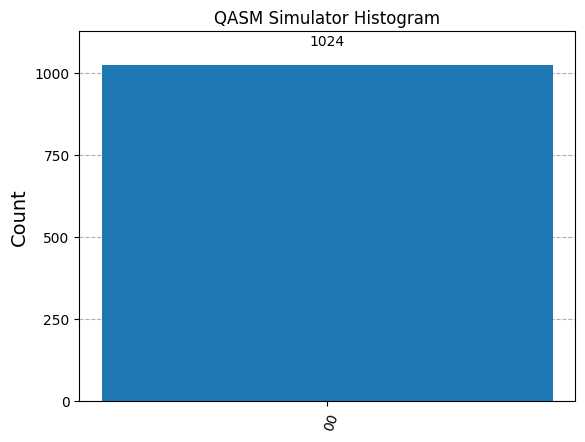

In [5]:
# %% [Create quantum circuit (CZ gate)]
circuit = QuantumCircuit(2, 2)  # 2 qubits, 2 classical bits
circuit.cz(0, 1)                # Apply CZ gate between qubits 0 and 1
circuit.measure([0, 1], [0, 1]) # Measure qubits 0 and 1 into classical bits 0 and

# %% [Simulate using QASM]
simulator = AerSimulator(method='automatic')  # Use AerSimulator with QASM
sim_job = simulator.run(circuit, shots=1024)  # Run with 1024 shots
sim_result = sim_job.result()
sim_counts = sim_result.get_counts()

# Show simulation result
print("QASM Simulator Result (Counts):", sim_counts)

# Plot histogram for simulation
plot_histogram(sim_counts, title="QASM Simulator Histogram")
plt.show()  # Ensure the plot displays

# Plot histogram for simulation using Qiskit's plot_histogram
plot_histogram(sim_counts, title="QASM Simulator Histogram")  # No .show() needed with %matplotlib inline

In [6]:
# %% [Run on IBM hardware]
service = QiskitRuntimeService()
backend = service.backend("ibm_brisbane")
ibm_job = Sampler(backend).run([circuit])  # Run on IBM Brisbane

# Show job ID and wait for result
print(f"IBM Job ID: {ibm_job.job_id()}")
ibm_result = ibm_job.result()
print("IBM Brisbane Result:", ibm_result)

# Extract and process IBM result for histogram
bit_array = ibm_result[0].data.c  # Access the measurement data
try:
    ibm_counts = bit_array.get_counts()  # Try built-in method
except AttributeError:
    # Manual counting if get_counts() is unavailable
    ibm_counts = {'0': 0, '1': 0}
    for shot in bit_array.array:
        outcome = str(shot)
        ibm_counts[outcome] = ibm_counts.get(outcome, 0) + 1

# Show IBM counts
print("IBM Brisbane Counts:", ibm_counts)

# Plot histogram for IBM result using Matplotlib
states = list(ibm_counts.keys())
values = list(ibm_counts.values())
plt.bar(states, values, color='skyblue')
plt.xlabel('Measurement Outcome')
plt.ylabel('Counts')
plt.title('IBM Brisbane Histogram')
plt.show()

# %%

IBMInputValueError: 'The instruction cz on qubits (0, 1) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'